<a href="https://colab.research.google.com/github/janwaelty/artwork_valuation/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Neural Networks and the Art Market: A Deep Learning Approach to Valuation
#   **Data preprocessing script**

**1. Library and data import**

In [19]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import re


drive.mount('/content/drive')
artist_data_path= "/content/drive/My Drive/artist_graph_data.xlsx"
artwork_numeric_data = pd.read_excel(artist_data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Categorical variables distribution**

Minimum category occurence is 75
Minimum sale_year_semi occurence is 95
Minimum artist occurence is 10
Minimum medium occurence is 1
Minimum sale_house occurence is 1
category                 0
sale_year                0
sale_year_semi           0
sale_price               0
artist                   0
purchase_year            0
purchase_year_semi       0
purchase_price           0
auction_interval         0
return_value             0
artist_num               0
title                    9
sale_low_est             0
sale_high_est            0
purchase_low_est         0
purchase_high_est        0
height                   0
width                    0
medium                  18
sale_date                0
purchase_date            0
mtm                      0
sale_house               0
purchase_house           0
sale_lot                 1
purchase_lot             0
image_url             1201
dtype: int64


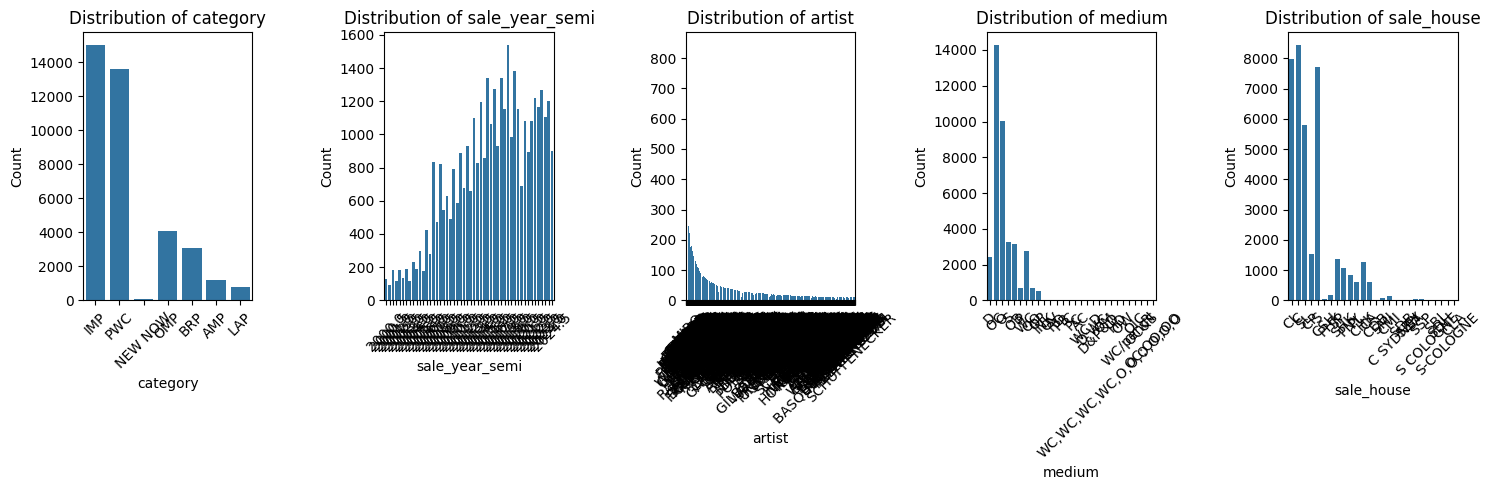

category              0
sale_year             0
sale_year_semi        0
sale_price            0
artist                0
purchase_year         0
purchase_year_semi    0
purchase_price        0
auction_interval      0
return_value          0
artist_num            0
title                 0
sale_low_est          0
sale_high_est         0
purchase_low_est      0
purchase_high_est     0
height                0
width                 0
medium                0
sale_date             0
purchase_date         0
mtm                   0
sale_house            0
purchase_house        0
sale_lot              0
purchase_lot          0
image_url             0
dtype: int64


In [20]:
# List of categorical variables
categorical_columns = ['category', 'sale_year_semi', 'artist',
                                       'medium', 'sale_house']

# get minimum occurence per variable
for idx, var in enumerate(categorical_columns):
  counts = artwork_numeric_data[var].value_counts()
  print(f"Minimum {var} occurence is {min(counts)}")

# remove entries with missing values
missing_values = artwork_numeric_data.isna().sum()
print(missing_values)
artwork_numeric_data.dropna(axis=0, how='any', inplace=True)



# visualize distribution of categorical variables
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))


for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=column, data=artwork_numeric_data, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

missing_values = artwork_numeric_data.isna().sum()
print(missing_values)


**2.Numerical features preprocessing**

Preprocessing (one-hot encoding of categorical features, drop of irrelevant categories etc)

In [21]:

def repeated_to_single_transactions(df):
    """
    Transforms a dataset by splitting purchase and sale data into separate rows
    and renaming columns for consistency.
    """
    # Columns to keep (common info)
    common_columns = ['category', 'artist', 'height', 'width', 'medium']

    # Sale Data: Keep only relevant columns
    sale_data = df[common_columns + ['sale_year_semi', 'sale_price',
                                     'sale_house']].copy()
    sale_data = sale_data.rename(columns={
        'sale_year_semi': 'transaction_year_semi',
        'sale_price': 'transaction_price',
        'sale_house': 'transaction_house'
    })


    # Purchase Data: Keep only relevant columns
    purchase_data = df[common_columns + ['purchase_year_semi', 'purchase_price',
                                         'purchase_house']].copy()
    purchase_data = purchase_data.rename(columns={
        'purchase_year_semi': 'transaction_year_semi',
        'purchase_price': 'transaction_price',
        'purchase_house': 'transaction_house'
    })

    final_df = pd.concat([sale_data, purchase_data], ignore_index=True)

    return final_df


def one_hot(data, vars):
  # one-hot encoding for various categorical variables
  df = data.copy()
  return pd.get_dummies(df, columns=vars)


def select_cols(data, vars):
  df = data.copy()
  return df[vars]

    # Optionally: Standardize the features (important for neural networks)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


In [22]:
# check transformations

print(artwork_numeric_data.columns)

cols = ['category', 'sale_year_semi', 'sale_price', 'artist',
        'purchase_year_semi', 'purchase_price', 'height', 'width',
        'medium', 'sale_house', 'purchase_house']

data_check = select_cols(artwork_numeric_data.copy(), cols)
print(data_check.columns)
print(data_check.head())

data_check = repeated_to_single_transactions(data_check)
print(data_check)
print(data_check.head())


Index(['category', 'sale_year', 'sale_year_semi', 'sale_price', 'artist',
       'purchase_year', 'purchase_year_semi', 'purchase_price',
       'auction_interval', 'return_value', 'artist_num', 'title',
       'sale_low_est', 'sale_high_est', 'purchase_low_est',
       'purchase_high_est', 'height', 'width', 'medium', 'sale_date',
       'purchase_date', 'mtm', 'sale_house', 'purchase_house', 'sale_lot',
       'purchase_lot', 'image_url'],
      dtype='object')
Index(['category', 'sale_year_semi', 'sale_price', 'artist',
       'purchase_year_semi', 'purchase_price', 'height', 'width', 'medium',
       'sale_house', 'purchase_house'],
      dtype='object')
  category  sale_year_semi  sale_price   artist  purchase_year_semi  \
0      IMP          2015.0       21643  PICASSO              2014.5   
1      IMP          2016.5     3007500  PICASSO              2014.5   
2      IMP          2018.0       21388  PICASSO              2017.0   
3      IMP          2020.0        9531  PICASSO  

**4. Data split**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import pandas as pd

def data_split(df):
    """
    Splits the dataset into training and testing sets based on the last semi-year.

    Parameters:
    df (pd.DataFrame): DataFrame with transaction data, including 'transaction_year_semi' and 'transaction_price'.

    Returns:
    X_train, X_test, y_train, y_test: Features and target variables for training and testing.
    """

    # Convert categorical variables (e.g., 'transaction_year_semi') to dummy variables
    df = pd.get_dummies(df, columns=['transaction_year_semi'], drop_first=True)

    # Identify the last semi-year based on the highest value of 'transaction_year_semi'
    last_semi_year = df['transaction_year_semi'].max()  # This gives the most recent semi-year, e.g., 2020.5

    # Split the data into training and testing sets:
    # - Training set: All data before the last semi-year
    # - Test set: Only data from the last semi-year
    train_data = df[df['transaction_year_semi'] < last_semi_year]  # Use all data before the last semi-year
    test_data = df[df['transaction_year_semi'] == last_semi_year]  # Use data from the last semi-year for testing

    # Prepare X and y for both training and testing
    X_train = train_data.drop(columns='transaction_price')
    y_train = train_data['transaction_price']
    X_test = test_data.drop(columns='transaction_price')
    y_test = test_data['transaction_price']

    # Ensure both X_train and X_test have the same columns (after dummy creation)
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

    return X_train, X_test, y_train, y_test



In [23]:
print(artwork_numeric_data.shape)
"""
def preprocess_title(title):
    title = title.lower()  # Convert to lowercase
    title = re.sub(r'[^\w\s]', '', title)  # Remove non-alphanumeric characters
    return title

# Apply preprocessing
artwork_numeric_data['title'] = artwork_numeric_data['title'].apply(preprocess_title)

# Handle missing values in title before applying TF-IDF
artwork_numeric_data['title'] = artwork_numeric_data['title'].fillna('')  # Fill NaNs with empty string



# Apply TF-IDF on the 'title' column
def tf_vectorizer(data):
    tfidf = TfidfVectorizer(max_df=0.9, min_df=10)
    tfidf_matrix = tfidf.fit_transform(data['title'])  # Apply TF-IDF transformation
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

    return pd.concat([data, tfidf_df], axis=1)




artwork_numeric_data = tf_vectorizer(artwork_numeric_data)
"""


(75606, 8)


"\ndef preprocess_title(title):\n    title = title.lower()  # Convert to lowercase\n    title = re.sub(r'[^\\w\\s]', '', title)  # Remove non-alphanumeric characters\n    return title\n\n# Apply preprocessing\nartwork_numeric_data['title'] = artwork_numeric_data['title'].apply(preprocess_title)\n\n# Handle missing values in title before applying TF-IDF\nartwork_numeric_data['title'] = artwork_numeric_data['title'].fillna('')  # Fill NaNs with empty string\n\n\n\n# Apply TF-IDF on the 'title' column\ndef tf_vectorizer(data):\n    tfidf = TfidfVectorizer(max_df=0.9, min_df=10)\n    tfidf_matrix = tfidf.fit_transform(data['title'])  # Apply TF-IDF transformation\n    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())\n\n    return pd.concat([data, tfidf_df], axis=1)\n\n\n\n\nartwork_numeric_data = tf_vectorizer(artwork_numeric_data)\n"

In [ ]:
print(artwork_numeric_data)
missing_values = artwork_numeric_data.isna().sum()
print(missing_values)






       sale_year  sale_price  purchase_year  purchase_year_semi  \
0           2015       21643           2014              2014.5   
1           2016     3007500           2014              2014.5   
2           2018       21388           2017              2017.0   
3           2020        9531           2019              2019.0   
4           2016      211500           2016              2016.0   
...          ...         ...            ...                 ...   
39024       2021       69552           2009              2009.5   
39025       2023      115642           2009              2009.0   
39026       2022      111922           2009              2009.0   
39027       2020      135000           2008              2008.0   
39028       2019      212500           2015              2015.5   

       purchase_price  auction_interval  return_value  artist_num  \
0               12657               0.5      1.923970           1   
1              829800               2.0      0.903777    